In [6]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [380]:
def linear(m=3, c=3, n=100):
    x = np.linspace(0, 10, n)
    noise = np.random.normal(loc=0, scale=3, size=n)
    y = m*x+c+noise
    yline = m*x+c
    return x, y, yline

In [381]:
def curvilinear(m=3, c=3, n=400):
    x = np.linspace(0, 2, n)
    noise = np.random.normal(loc=0, scale=2, size=n)
    y = 2*x**4+x**3+3*x*x-2*x+c+noise
    yline = 2*x**4+x**3+3*x*x-2*x+c
    return x, y, yline

In [382]:
X, y, line = linear()

In [383]:
reg = LinearRegression(fit_intercept=True).fit(np.expand_dims(X, axis=1), y)
reg_line = reg.predict(np.expand_dims(X, axis=1))


Text(0, 0.5, 'y')

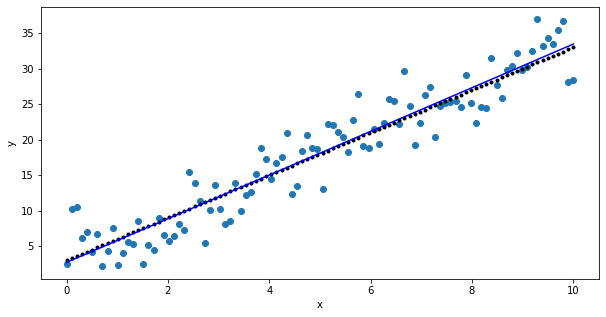

In [384]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, line, '.',color='black')
plt.plot(X, reg_line,color='blue')
plt.xlabel('x')
plt.ylabel('y')

In [385]:
def sin(n):
    x = np.linspace(0, 1, n)
    noise = np.random.normal(loc=0, scale=0.3, size=n)
    y = np.array([np.math.sin(2*np.pi*a) for a in x.tolist()]) + noise    
    return x, y

In [386]:
X, y = sin(50)

In [387]:
#features = np.expand_dims(X, axis=1)
def n_degree_features(X, n):
    if n>0:
        powers = [np.power(X, p) for p in range(n)] 
    else:
        raise ValueError('Expected positive n')
    features = np.transpose(np.vstack(powers))
    return features

In [388]:
features = n_degree_features(X, 4)

In [389]:
d = 1

In [390]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
polynomial_features= PolynomialFeatures(degree=d)
features = polynomial_features.fit_transform(np.expand_dims(X, axis=1))

In [391]:
reg = LinearRegression().fit(features, y)

In [392]:
coeff_df = pd.DataFrame(np.round(reg.coef_,2)).T
coeff_df.columns = ["x^{}".format(i) for i in range(d+1)]
coeff_df

,x^0,x^1
0,0.0,-1.72


In [393]:
reg = Ridge(alpha=1.).fit(features, y)
coeff_df2 = pd.DataFrame(np.round(reg.coef_,2)).T
coeff_df2.columns = ["x^{}".format(i) for i in range(d+1)]
coeff_df = pd.concat([coeff_df, coeff_df2])
coeff_df.to_csv('coeff.csv')
coeff_df

,x^0,x^1
0,0.0,-1.72
0,0.0,-1.40


In [394]:
line=reg.predict(features)

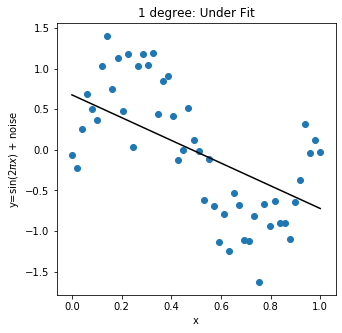

In [395]:
plt.figure(figsize=(5,5))
plt.scatter(X, y)
plt.plot(X, line, color='black')
plt.xlabel('x')
plt.ylabel('y=sin($2\pi x$) + noise')
plt.title('1 degree: Under Fit')
plt.savefig('sin_{}.png'.format(d), format='png', dpi=400)

In [544]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['flower']=np.apply_along_axis(lambda x: iris.target_names[x], 0, iris.target)

In [397]:
data = df[['petal width (cm)', 'petal length (cm)']].values
np.random.shuffle(data)

In [398]:
trainData = data[:120]
testData = data[120:]

In [399]:
reg = LinearRegression().fit(np.expand_dims(trainData[:,0], axis=1), trainData[:,1])

In [400]:
reg.score(np.expand_dims(testData[:,0], axis=1), testData[:,1])
line = reg.predict(np.expand_dims(testData[:,0], axis=1))

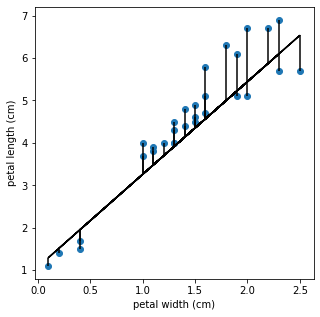

In [401]:
plt.figure(figsize=(5,5))
plt.scatter(testData[:,0], testData[:,1])
plt.plot(testData[:,0], line, color='black')
plt.vlines(x=testData[:,0], ymin=testData[:,1], ymax=line)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.savefig('iris_plen_w.png', format='png', dpi=400)

## Statsmodel Regression

In [548]:
import statsmodels.formula.api as smf

In [549]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width', 'flower']

In [550]:
model = smf.ols(formula="petal_length ~ petal_width", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           4.68e-86
Time:                        16:49:52   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0836      0.073     14.850      

In [561]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(['setosa', 'versicolor', 'virginica'])

In [565]:
df['f_name']=df.flower.apply(lambda f: le.transform([f])[0])

In [568]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower,f_name
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [566]:
log_reg = smf.logit(formula='f_name ~ sepal_length + sepal_width + petal_length' , data=df)

ValueError: endog must be in the unit interval.

In [567]:
results = log_reg.fit()

ValueError: operands could not be broadcast together with shapes (150,3) (150,) 

In [ ]:
smf.logit

In [403]:
x, y =sin(50)

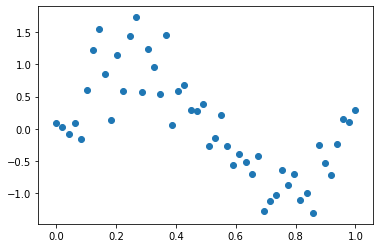

In [404]:
plt.scatter(x, y)

In [405]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=11)
xp = polynomial_features.fit_transform(np.expand_dims(x, axis=1))

In [406]:
xp.shape

(50, 12)

In [407]:
import statsmodels.api as sm

#model = sm.OLS(y, xp).fit_regularized(method='elastic_net', L1_wt=0.9)
model = sm.OLS(y, features).fit()
ypred = model.predict(features)

C:\Users\tghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


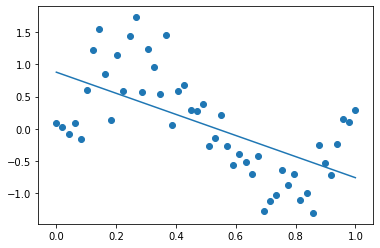

In [408]:
plt.scatter(x,y)
plt.plot(x,ypred)

In [409]:
model.params

array([ 0.87806386, -1.63550084])

In [410]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.373   
Dependent Variable: y                AIC:                96.1217 
Date:               2021-08-31 11:11 BIC:                99.9457 
No. Observations:   50               Log-Likelihood:     -46.061 
Df Model:           1                F-statistic:        30.13   
Df Residuals:       48               Prob (F-statistic): 1.50e-06
R-squared:          0.386            Scale:              0.38496 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      0.8781     0.1729    5.0788   0.0000    0.5304    1.2257
x1        -1.6355     0.2979   -5.4894   0.0000   -2.2345   -1.0365
-----------------------------------------------------------------
Omnibus:              4.005        Durbin-Watson:           0.737
Prob(Omnibus):        0.135        Jarque-Bera (JB):        2.246
Skew:                 0.272        Prob(JB):                0.325
Kurtosis:             2.115        Condition No.:           4    
=================================================================

"""

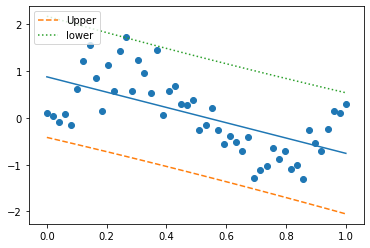

In [411]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

plt.scatter(x,y)
plt.plot(x,ypred)
plt.plot(x,upper,'--',label="Upper") # confid. intrvl
plt.plot(x,lower,':',label="lower")
plt.legend(loc='upper left')

In [412]:
df_sample = df[((df['flower']=='virginica')|(df['flower']=='versicolor'))][['petal length (cm)', 'flower']]

In [413]:
df_sample[['petal length (cm)', 'flower']].sample(10).head()

,petal length (cm),flower
66,4.5,versicolor
79,3.5,versicolor
110,5.1,virginica
107,6.3,virginica
69,3.9,versicolor


In [414]:
df_sample['y']=df_sample['flower'].apply(lambda x: 1.0 if x=='virginica' else 0.0)

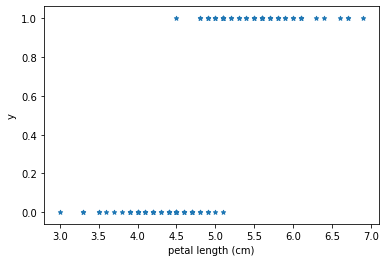

In [415]:
df_sample.plot.scatter(x="petal length (cm)", y='y', marker='*')

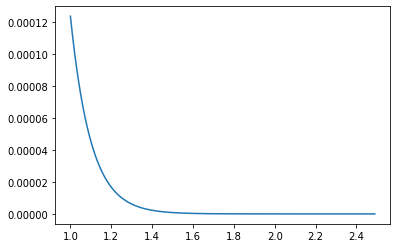

In [416]:
#plt.scatter(x=df_sample["petal width (cm)"].values, y=df_sample['y'])
x1 = np.arange(1.0, 2.5, 0.01)
y1 = 1/ (1+np.exp(-(-10*x1+1))) 
plt.plot(x1, y1)

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [418]:
model = LogisticRegression(C=10.0, random_state=0)

In [419]:
model.fit(np.expand_dims(df_sample["petal length (cm)"].values, axis=1),
         df_sample['y'].values)

C:\Users\tghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [420]:
ypred = model.predict_proba(np.expand_dims(sorted(df_sample["petal length (cm)"].values), axis=1))

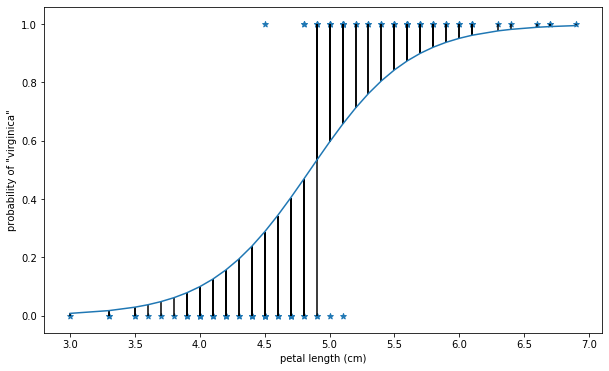

In [421]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_sample["petal length (cm)"].values, y=df_sample['y'], marker="*")
plt.xlabel('petal length (cm)')
plt.ylabel('probability of "virginica"')
plt.plot(sorted(df_sample["petal length (cm)"].values),ypred[:, 1])
plt.vlines(x=sorted(df_sample["petal length (cm)"].values), ymin=df_sample['y'], ymax=ypred[:, 1])
plt.savefig('iris_logistic_sig.png', format='png', dpi=400)

# Samplng Distributions

In [422]:
def samping_dist(n=3):
    x = np.random.exponential(size=n)
    #return  np.std(x)**2 
    return np.mean(x)

In [423]:
X= [samping_dist(n=5) for _ in range(200)]    

(array([12., 33., 37., 39., 31., 20., 13.,  7.,  5.,  3.]),
 array([0.20371697, 0.40843336, 0.61314975, 0.81786614, 1.02258253,
        1.22729892, 1.43201531, 1.6367317 , 1.84144809, 2.04616448,
        2.25088087]),
 <a list of 10 Patch objects>)

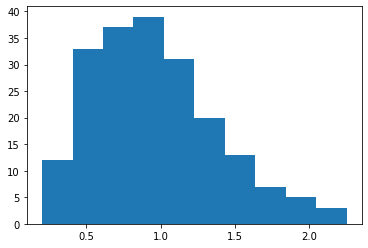

In [424]:
plt.hist(X)

# Bias Variance Tradeoff

In [425]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [426]:
X, y = sin(50)

In [427]:
datasets = [ sin(50) for i in range(100)]

In [428]:
bias_vars = {}

In [429]:
d = 5; lam = 0.001

In [430]:
preds = []; biases = []; variances = []; sses = []

In [431]:
for X, y in datasets:
    polynomial_features= PolynomialFeatures(degree=d)
    features = polynomial_features.fit_transform(np.expand_dims(X, axis=1))
    reg = Ridge(alpha=lam).fit(features, y)
    line=reg.predict(features)
    preds.append(line)
    sses.append(np.mean(np.square(line-np.sin(2*np.pi*X))))

In [432]:
np.mean(sses)

0.0190131744379637

In [433]:
E_y = np.mean(np.array(preds), axis=0)

In [434]:
bias_square = np.mean(np.square(E_y - np.sin(2*np.pi*X)))
bias_square

0.010178061609270275

In [435]:
variance = np.mean(np.square(line - E_y))
variance

0.0051010666808243

In [436]:
bias_square + variance

0.015279128290094576

In [437]:
bias_vars[np.math.log10(lam)]={'sse':np.mean(sses), 'bias_square':bias_square, 'variance': variance}
bias_vars

{-3.0: {'sse': 0.0190131744379637,
  'bias_square': 0.010178061609270275,
  'variance': 0.0051010666808243}}

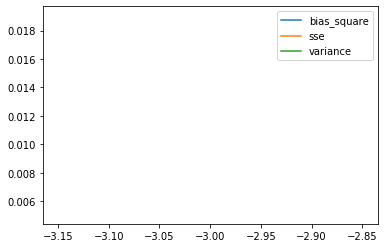

In [438]:
pd.DataFrame(bias_vars).transpose().plot()

Text(0, 0.5, 'y=sin($2\\pi x$) + noise')

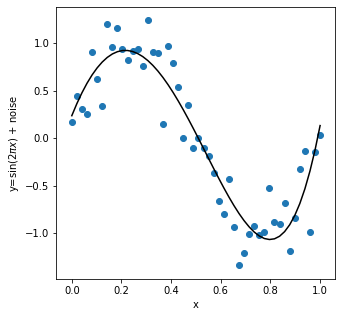

In [439]:
plt.figure(figsize=(5,5))
plt.scatter(X, y)
plt.plot(X, line, color='black')
plt.xlabel('x')
plt.ylabel('y=sin($2\pi x$) + noise')

In [447]:
np.random.seed(52)

In [494]:
def sin(n):
    x = np.linspace(0, 1, n)
    noise = np.random.normal(loc=0.0, scale=1., size=n)
    y = np.array([np.math.sin(2*np.pi*a) for a in x.tolist()]) + noise    
    return x, y

In [495]:
datasets = [sin(25) for i in range(200)]

In [523]:
d = 5;bias_vars = {};

In [524]:
#for lam in np.concatenate([np.linspace(0.0001, 1., 100), np.linspace(1., 10., 1.2)]):
for lam in np.linspace(0.001, 1.1, 100):
    preds = []; biases = []; variances = []; sses = [];
    for X, y in datasets:
        polynomial_features= PolynomialFeatures(degree=d)
        features = polynomial_features.fit_transform(np.expand_dims(X, axis=1))
        reg = Ridge(alpha=lam).fit(features, y)
        line=reg.predict(features)
        preds.append(line)
        sses.append(np.mean(np.square(line-np.sin(2*np.pi*X))))
    E_y = np.mean(np.array(preds), axis=0)
    bias_square = np.mean(np.square(E_y - np.sin(2*np.pi*X)))
    variance = np.mean(np.square(line - E_y))
    tot = bias_square + variance
    test_error = np.mean(sses)
    bias_vars[np.math.log(lam)]={'$bias^2$+variance':tot, '$bias^2$':bias_square,
                                 'variance': variance, 'test_error':test_error}

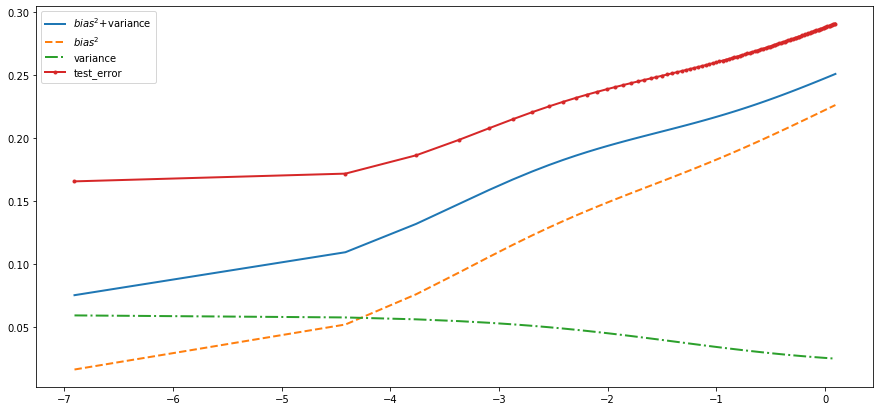

In [525]:
pd.DataFrame(bias_vars).transpose().plot(figsize=(15,7),linewidth=2, style=["-","--","-.",".-"])

In [519]:
pd.DataFrame(bias_vars).transpose()

,$bias^2$+variance,$bias^2$,variance,test_error
1,0.259359,0.224555,0.034804,0.290994
2,0.280851,0.225033,0.055818,0.329243
3,0.066132,0.007300,0.058832,0.151868
4,0.066741,0.007626,0.059115,0.166980
5,0.064932,0.005598,0.059334,0.182583
6,0.062942,0.003332,0.059609,0.189955
7,0.062109,0.002119,0.059991,0.195842
8,0.062238,0.001916,0.060323,0.202637
9,0.062454,0.002087,0.060367,0.209442
10,0.062439,0.002244,0.060195,0.215349


In [521]:
for d in range(1,30):
    preds = []; biases = []; variances = []; sses = [];
    for X, y in datasets:
        polynomial_features= PolynomialFeatures(degree=d)
        features = polynomial_features.fit_transform(np.expand_dims(X, axis=1))
        reg = Ridge(alpha=0.001).fit(features, y)
        line=reg.predict(features)
        preds.append(line)
        sses.append(np.mean(np.square(line-np.sin(2*np.pi*X))))
    E_y = np.mean(np.array(preds), axis=0)
    bias_square = np.mean(np.square(E_y - np.sin(2*np.pi*X)))
    variance = np.mean(np.square(line - E_y))
    tot = bias_square + variance
    test_error = np.mean(sses)
    bias_vars[d]={'$bias^2$+variance':tot, '$bias^2$':bias_square,
                                 'variance': variance, 'test_error':test_error}

In [513]:
np.exp(-4.5)

0.011108996538242306

In [1]:
import numpy as np

([<matplotlib.axis.XTick at 0x1afcc5b45c8>,
 <a list of 5 Text xticklabel objects>)

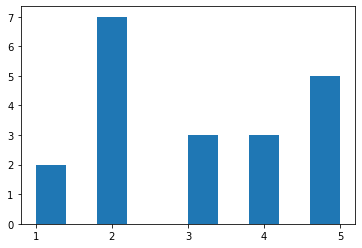

In [17]:
plt.hist ((np.random.choice([1,2,3,4,5], 20, p=[0.2,0.4,0.1,0.1,0.2])))
plt.xticks([1,2,3,4,5])

In [ ]:
np.random.choice()